# Deepfake Detection - Comparing Face Detectors

In this notebook, we will be comparing the different open source face detectors.

1. **MTCNN**
    *https://github.com/ipazc/mtcnn*
2. **RetinaFace**
    *https://github.com/serengil/retinaface*

In [1]:
import cv2
import numpy as np
import os
import time

from PIL import Image

## Load and Output

In [2]:
multiface_image = "sample-images/multiple-faces.jpg"
img = cv2.imread(multiface_image)

### MTCNN

MTCNN outputs a list of identified faces.

In [3]:
from mtcnn import MTCNN

mtcnn = MTCNN()
mtcnn.detect_faces(img)

2022-05-26 17:30:41.546246: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-26 17:30:41.546933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-26 17:30:41.547211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: AMD Radeon Pro 5500M


2022-05-26 17:30:42.224742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:30:42.519410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:30:42.717870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:30:43.858569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:30:44.952287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[{'box': [1296, 48, 251, 307],
  'confidence': 0.9902481436729431,
  'keypoints': {'left_eye': (1398, 161),
   'right_eye': (1514, 156),
   'nose': (1478, 204),
   'mouth_left': (1420, 284),
   'mouth_right': (1521, 277)}},
 {'box': [236, 191, 216, 276],
  'confidence': 0.9727864861488342,
  'keypoints': {'left_eye': (276, 296),
   'right_eye': (371, 295),
   'nose': (303, 349),
   'mouth_left': (281, 399),
   'mouth_right': (368, 399)}}]

### RetinaFace

RetinaFace outputs a dictionary of different faces.

In [4]:
from retinaface import RetinaFace

img = cv2.imread(multiface_image)
RetinaFace.detect_faces(img)

2022-05-26 17:30:48.336025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


{'face_1': {'score': 0.9997426867485046,
  'facial_area': [253, 177, 470, 477],
  'landmarks': {'right_eye': [280.83682, 297.97144],
   'left_eye': [363.45413, 296.69656],
   'nose': [292.15662, 355.32697],
   'mouth_right': [288.2101, 400.1632],
   'mouth_left': [361.88803, 399.48785]}},
 'face_2': {'score': 0.9996591806411743,
  'facial_area': [1308, 41, 1560, 380],
  'landmarks': {'right_eye': [1417.3353, 154.22382],
   'left_eye': [1521.9045, 156.9613],
   'nose': [1504.0908, 202.60379],
   'mouth_right': [1430.2915, 275.61765],
   'mouth_left': [1525.5427, 277.45453]}}}

## Evaluation times

Note: MTCNN is using tensorflow-metal, the GPU backend for tensorflow on MacOS.

In [5]:
sample_images = [
  'sample-images/sample0.png',
  'sample-images/sample1.png',
  'sample-images/sample2.png',
  'sample-images/sample3.png',
  'sample-images/sample4.png'
]

In [23]:
# MTCNN
mtcnn_times = []
mtcnn_results = {}
for path in sample_images:
  img = cv2.imread(path)
  stime = time.time()
  res = mtcnn.detect_faces(img)
  etime = time.time()
  mtcnn_results[path] = res
  mtcnn_times.append(etime-stime)
  
mtcnn_avg = sum(mtcnn_times)/len(mtcnn_times)
mtcnn_avg

3.907158899307251

In [24]:
# RetinaFace
rf_times = []
rf_results = {}
for path in sample_images:
  img = cv2.imread(path)
  stime = time.time()
  res = RetinaFace.detect_faces(img)
  etime = time.time()
  rf_results[path] = res
  rf_times.append(etime-stime)
  
rf_avg = sum(rf_times)/len(rf_times)
rf_avg

2.6512571811676025

## Drawing Faces

In [8]:
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from typing import List, Union

AVAILABLE_MODELS = ["mtcnn", "retinaface"]

class DetectorCmap:
  """
  Custom cmap.
  Used for drawing 
  
  """
  def __init__(self, l=None):
    if l is None:
      self.cmap = self.set_default_cmap()
    else:
      self.cmap = self.set_cmap(l)

  def set_default_cmap(self):
    c = ["red", "orange", "yellow", "greenyellow", "limegreen"]
    v = [0, .25, .5, .76 , 1.]
    l = list(zip(v,c))
    self.cmap = LinearSegmentedColormap.from_list("ryg", l, N=1000)
    return self.cmap
  
  def set_cmap(self, l):
    self.cmap = LinearSegmentedColormap.from_list("custom", l, N=1000)
    return self.cmap
  
  def get_rgb(self, k:float):
    if k < 0 or k > 1:
      raise ValueError("k value should be between 0 and 1.")
    rgba = self.cmap(k)
    r, g, b = int(rgba[0]*256), int(rgba[1]*256), int(rgba[2]*256)
    return r, g, b

  def display_cmap(self):
    fig, ax = plt.subplots(1,1,figsize=(6,1))
    ax.imshow(np.array([np.arange(1000) for i in range(100)]), cmap=self.cmap)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([0,500,1000])
    plt.show()
    

class FaceExtractor:
  
  def __init__(self, model:str, thresh:float=0.5):
    if model not in AVAILABLE_MODELS:
      raise Exception(f"{model} not valid.")
    self.model = model
    self.detector = self._initialise_detector()
    self.cmap = DetectorCmap()
    self.thresh = thresh
    
  def _initialise_detector(self) -> None:
    if self.model == "mtcnn":
      from mtcnn import MTCNN
      return MTCNN()
    elif self.model == "retinaface":
      from retinaface import RetinaFace
      return RetinaFace
  
  def draw_face_on_image(self, img: Union[str, np.ndarray], 
                         padding=0.3, width=2):
    """
    Detects a face and draws a rectangle on the image.
    """
    if type(img) == str:
      img = self.open_image(img)
    
    # Image size
    img_y = img.shape[0]
    img_x = img.shape[1]
    
    faces = self.detect_faces(img)
    for face in faces:
      if self.model == "mtcnn":
        x, y, w, h = face['box']
      elif self.model == "retinaface":
        x, y, w, h = face['box']
      if padding:
        x, y, w, h = self.add_padding(x,y,w,h, img_x, img_y, padding)
      confidence = face['confidence']
      box_colour = self.cmap.get_rgb(confidence)
      # Draws the rectangle on the img
      cv2.rectangle(img, (x,y), (x+w, y+h), box_colour , width)
    return img
  
  def crop_detected_face(self, img: Union[str, np.ndarray], padding:float=0.3) -> List[np.ndarray]:
    if type(img) == str:
      img = self.open_image(img)
    img_y = img.shape[0]
    img_x = img.shape[1]
    cropped_images = []
    faces = self.detect_faces(img)
    for face in faces:
      if face['confidence'] > self.thresh:
        x, y, w, h = face['box']
        if padding:
          x, y, w, h = self.add_padding(x,y,w,h, img_x, img_y, padding)
        cropped_images.append(img[y:y+h, x:x+h])
    return cropped_images
  
  def detect_faces(self, img: np.ndarray) -> List:
    faces = []
    results = self.detector.detect_faces(img)
    for res in results:
      if self.model == "mtcnn":
        box = tuple(res['box'])
        confidence = res['confidence']
      elif self.model == "retinaface":
        # If 'res' is not a face key in the results output
        if type(res) is not str: 
          return []
        res = results[res]
        x, y, xmax, ymax = tuple(res['facial_area'])
        w, h = xmax-x, ymax-y
        box = tuple((x, y, w, h))
        confidence = res['score']
      faces.append({
        'box': box,
        'confidence': confidence
      })
    return faces

  def add_padding(self, x:int, y:int, w:int, h:int, xlim: int, ylim: int, 
                  amount:float=0.3) -> tuple:
    """
    Returns the dimensions after a padding amount has been added.
    Defaults to add 30% padding.
    """
    # Adds paddding
    new_w = int(w * (1 + amount)) 
    new_h = int(h * (1 + amount))      
    new_x = x - int( (new_w - w)/2 )
    new_y = y - int( (new_h - h)/2 )
    # Check limits
    if new_w > xlim:
      new_w = xlim
      new_x = 0
    if new_h > ylim:
      new_h = ylim
      new_y = 0
    if new_x < 0:
      new_x = 0
    if new_y < 0:
      new_y = 0
    return new_x, new_y, new_w, new_h
  
  def open_image(self, image_path: str) -> np.ndarray:
    img = cv2.imread(image_path)
    if img is None:
      raise FileNotFoundError(f"{image_path} not found.")
    return img

The DetectorCmap allows us to make a custom cmap that can be used for colouring the bounding boxes for detected faces.

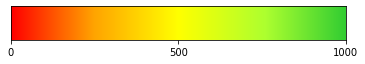

In [9]:
cmap = DetectorCmap()
cmap.display_cmap()

Example:
- For a low confidence level, the color is red
- For a high confidence level, the color is green

In [10]:
cmap.get_rgb(0.123), cmap.get_rgb(0.8910)

((256, 81, 0), (105, 228, 48))

## Tests

In [11]:
face_extractor1 = FaceExtractor("mtcnn")
face_extractor2 = FaceExtractor("retinaface")

### Test 1: Face Yaw

In [21]:
path = "sample-images/sample0.png"
mtcnn_img = face_extractor1.draw_face_on_image(path, padding=0.3, width=10)
rf_img = face_extractor2.draw_face_on_image(path, padding=0.3, width=10)

# Save images
cv2.imwrite("sample-images/sample0-mtcnn.png", mtcnn_img)
cv2.imwrite("sample-images/sample0-retinaface.png", rf_img)

True

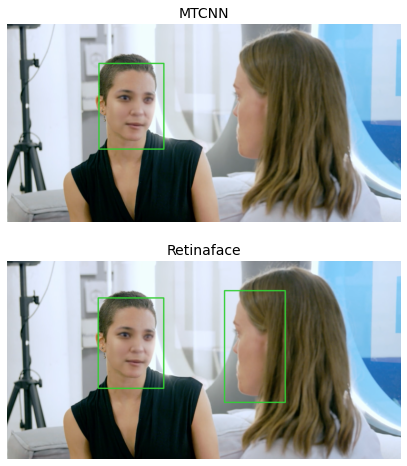

In [22]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
img1 = cv2.imread("sample-images/sample0-mtcnn.png")
img2 = cv2.imread("sample-images/sample0-retinaface.png")
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title("MTCNN", fontsize=14)
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title("Retinaface", fontsize=14)
ax[1].axis('off')
plt.show()

**Conclusion:** MTCNN is unable to detect face yaw whereas Retinaface is able to.

### Test 2: Large faces

In [14]:
path = "sample-images/large-face.jpg"
mtcnn_img = face_extractor1.draw_face_on_image(path, width=10)
rf_img = face_extractor2.draw_face_on_image(path, width=10)

# Save images
cv2.imwrite("sample-images/large-face-mtcnn.png", mtcnn_img)
cv2.imwrite("sample-images/large-face-retinaface.png", rf_img)

True

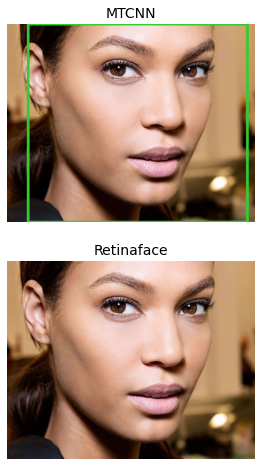

In [15]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
img1 = cv2.imread("sample-images/large-face-mtcnn.png")
img2 = cv2.imread("sample-images/large-face-retinaface.png")
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title("MTCNN", fontsize=14)
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title("Retinaface", fontsize=14)
ax[1].axis('off')
plt.show()

**Conclusion:** MTCNN is able to detect faces that take up most of the frame, whereas Retinaface isn't able to.

## Function tests

1. **Crop function** - if confidence level is high, crop the face with the padding

2. **Image rescaler** - set a size limit for the face size.
3. **Crop best face function**

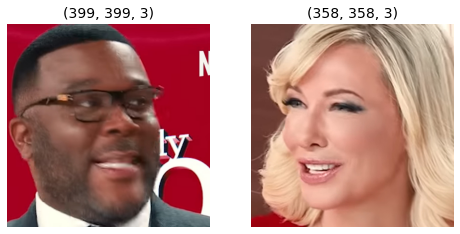

In [16]:
path = "sample-images/multiple-faces.jpg"
cropped_images = face_extractor1.crop_detected_face(path,padding=0.3)

n_images = len(cropped_images)
if n_images > 0:
  fig, ax = plt.subplots(1,n_images,figsize=(8,8))
  for i, img in enumerate(cropped_images):
    if len(cropped_images) > 1:
      ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax[i].set_title(f"{img.shape}", fontsize=14)
      ax[i].axis('off')
    else:
      ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax.set_title(f"{img.shape}", fontsize=14)
      ax.axis('off')
  plt.show()

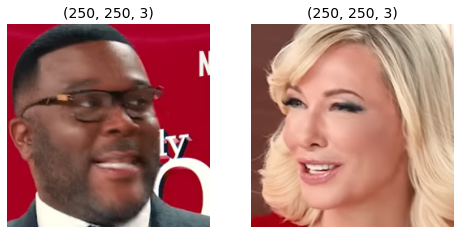

In [17]:
def resize(img: np.ndarray, dim: tuple) -> np.ndarray:
  return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

dim = (250, 250)
cropped_images = [ resize(img, dim) for img in cropped_images ]

n_images = len(cropped_images)
if n_images > 0:
  fig, ax = plt.subplots(1,n_images,figsize=(8,8))
  for i, img in enumerate(cropped_images):
    if len(cropped_images) > 1:
      ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax[i].set_title(f"{img.shape}", fontsize=14)
      ax[i].axis('off')
    else:
      ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax.set_title(f"{img.shape}", fontsize=14)
      ax.axis('off')
  plt.show()

2022-05-26 17:31:27.669659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:31:27.931422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:31:28.170861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:31:29.343052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 17:31:29.668359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


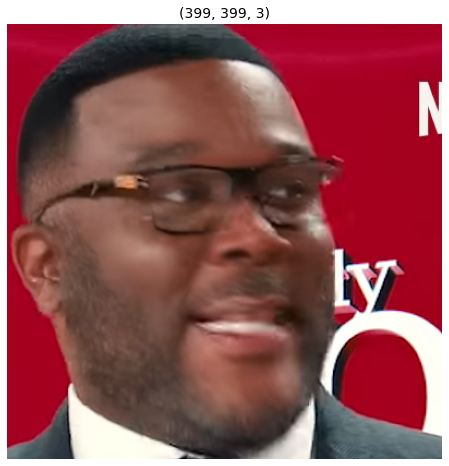

In [18]:
import os
import sys
# Enables import of modules under 'model'
sys.path.append(os.path.dirname(os.getcwd()))

from extractors import FaceExtractor

face_extractor = FaceExtractor(model="mtcnn", thresh=0.87)
face, conf = face_extractor.crop_best_face(path)

cropped_images = [face]
n_images = len(cropped_images)
if n_images > 0:
  fig, ax = plt.subplots(1,n_images,figsize=(8,8))
  for i, img in enumerate(cropped_images):
    if len(cropped_images) > 1:
      ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax[i].set_title(f"{img.shape}", fontsize=14)
      ax[i].axis('off')
    else:
      ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax.set_title(f"{img.shape}", fontsize=14)
      ax.axis('off')
  plt.show()